In [97]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

Přı́prava dat

In [98]:
#Načítám data
data =pd.read_csv("adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [99]:
#Přejmenování sloupců
data.columns = ["Serial_no", "GRE_score", "TOEFL_score", "University_rating", "SOP", "LOR", "CGPA", "Research", "Chance_of_Admit"]
data.head()

,Serial_no,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Normálnost dat pro TOEFL skóre

In [100]:
#Počítání průměru, mediánu a směrodatné odchylky TOEFL
print("TOEFL_score mean: ", data["TOEFL_score"].mean())
print("TOEFL_score median: ", data["TOEFL_score"].median())
print("TOEFL_score standard deviation: ", data["TOEFL_score"].std())

TOEFL_score mean:  107.41
TOEFL_score median:  107.0
TOEFL_score standard deviation:  6.069513777374126


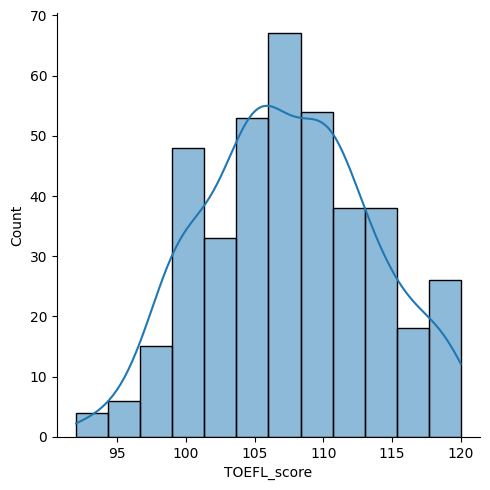

In [101]:
#Kreslení histogramu a funkce hustoty pro TOEFL score
sns.displot(data=data, x="TOEFL_score", kde=True)

In [102]:
#Testování dat na normální rozdělení
stats.normaltest(data["TOEFL_score"])


NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

Jelikož p-hodnota je menší než 0.05, odmítáme nulovou hypotézu, že data mají normální rozdělení. Takže předpokládáme, že data nemají normální rozdělení.

Testovánı́ hypotéz

In [103]:
#Rozdělujeme data do skupin, které měli a neměli zkušenost s výzkumem.
data_res = data[data["Research"]==1]
data_no_res = data[data["Research"]==0]


In [104]:
#Počítáme průměrný GRE score pro obě skupiny
print("Průměrný GRE score pro studenty, kteří měli zkušenost s výzkumem: ", data_res["GRE_score"].mean())
print("Průměrný GRE score pro studenty, kteří neměli zkušenost s výzkumem: ", data_no_res["GRE_score"].mean())

Průměrný GRE score pro studenty, kteří měli zkušenost s výzkumem:  322.85388127853884
Průměrný GRE score pro studenty, kteří neměli zkušenost s výzkumem:  309.49171270718233


In [105]:
#Abychom otestovali, zda rozdíl ve skóre GRE je statisticky významný, používáme Mann-Whitney U test, jelikož naše data nemají normální rozdělení.
statistics, pvalue = stats.mannwhitneyu(data_res["GRE_score"], data_no_res["GRE_score"], alternative="greater")
pvalue

5.7166932108240495e-33

Protože p-hodnota je menší než 0.05, odmítáme nulovou hypotézu, že GRE score studentů z obou skupin jsou stejná, a přijímáme alternativní hypotézu, že rozdíl mezi GRE score studentů, kteří měli zkušenost s výzkumem, a GRE score studentů, kteří zkušenost s výzkumem neměli, je statisticky významný. A to je, že studenti, kteří měli zkušenost s výzkumem, mají vyšší GRE score.

Korelace

In [106]:
#Počítáme korelaci mezi TOEFL a GRE score
data.corr()

,Serial_no,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_no,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Korelace mezi TOEFL a GRE score je 0.84. Korelace je pozitivní a vysoká, což znamená, že TOEFL a GRE score mají silnou přímou lineární závislost.

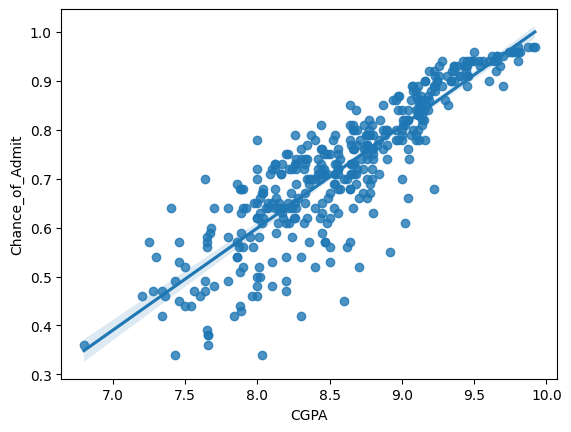

In [107]:
#Největší korelaci s šancí na přijetí má průměrná znamka z bakalářského studia. Vytváříme korelační graf těchto proměnných
g = sns.regplot(data, x="CGPA", y="Chance_of_Admit")

Vysvětlovaná proměnná

<Axes: xlabel='Chance_of_Admit'>

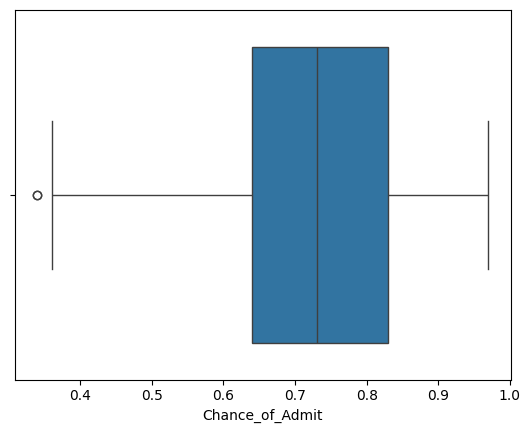

In [108]:
#Vytváříme boxplot vysvětlované proměnné (šance na přijetí), abychom viděli případné odlehlé hodnoty
sns.boxplot(data, x="Chance_of_Admit")

In [109]:
#Odstraníme odlehlá pozorování pomocí metody IQR
q1=data['Chance_of_Admit'].quantile(0.25)
q3=data['Chance_of_Admit'].quantile(0.75)
IQR=q3-q1

data_clean = data[((data['Chance_of_Admit']>(q1-1.5*IQR)) & (data['Chance_of_Admit']<(q3+1.5*IQR)))]


Lineárnı́ regrese

Pro model lineární regrese jako vysvětlující proměnné bereme všechny proměnné z tabulky, jelikož všechny mají silnou korelaci (>0.5) s vysvětlovanou proměnnou (šanci na přijetí).

In [110]:
#Sestavujeme rovnici pro lineární regresi
formula = "Chance_of_Admit ~ CGPA + GRE_score + TOEFL_score + University_rating + SOP + LOR + Research"

#Spočítáme parametry lineárního regresního modelu
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 09 May 2024   Prob (F-statistic):          3.12e-134
Time:                        17:01:25   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2594      0.125    -10.097      0.000      -1.505      -1.014
CGPA                  0.1189      0.012      9.734      0.000       0.095       0.143
GRE_score             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL_score           0.0029      0.001      2.680      0.008       0.001       0.005
University_rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                  -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                   0.0224      0.006      4.034      0.000       0.011       0.033
Research              0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Všechny koeficienty kromě university rating a SOP jsou statisticky významné (P>|t|). Ale většina koeficientů má hodnotu blízko nuly. Z našeho modelu plyne, že největší vliv na šanci na přijetí má průměrná znamka z bakalářského studia (CGPA), která má koeficient 0.12. Zkušenost s výzkumem a LOR jsou na druhém místě a mají koeficienty 0.02. TOEFL score a GRE score mají koeficienty, i když jsou statisticky významné, ale jsou velmi blízko nuly (0.003 a 0.002).

Koeficient determinace (R-squared) je 0.8, což znamená, že náš model vysvětluje 80% variability šance na přijetí.


Cookova vzdalenost

In [111]:
#Počítáme Cookovu vzdálenost pro jednotlivé body
influence = OLSInfluence(res)
data_clean['Cook_Distance'] = influence.cooks_distance[0]
data_clean.head()


/tmp/ipykernel_300090/3814541382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cook_Distance'] = influence.cooks_distance[0]


,Serial_no,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Cook_Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000423
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000771
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002327
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001616
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000090


Maximalni Cookova vzdalenost:  0.043395362731962074


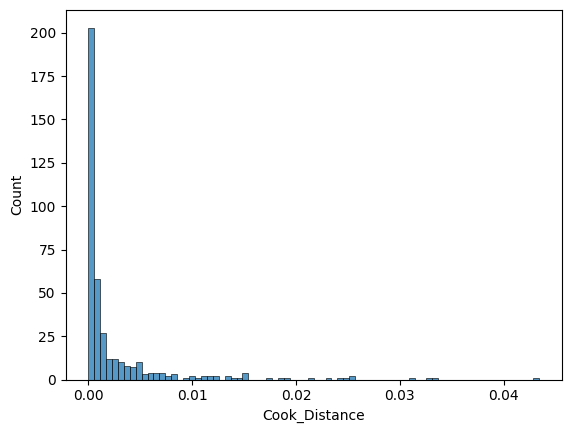

In [112]:
#Vytváříme histogram pro Cookovou vzdálenost
sns.histplot(data_clean['Cook_Distance'])
print("Maximalni Cookova vzdalenost: ", data_clean['Cook_Distance'].max())

Cookova vzdálenost pro většinu hodnot je v rozmezí 0 - 0.01. Čím větší vzdálenost, tím víc bod ovlivňuje regresní funkci. Největší Cookova vzdálenost v hodnotách našeho modelu je 0.043. Pokud se budeme řídit pravidlem, že musíme odstranit hodnoty s Cookovou vzdáleností větší než 1, v našem případě nemusíme odstraňovat žádné body.